## Tool per la generazione di run batch

Il tool è installato come script della shell. Potete eseguire il codice richiamando in una cella di codice usando il punto esclamativo prima del comando stesso.

```bash
!propagator_batch.sh
```

Il codice ha diverse opzioni che potete vedere usando il comando **--help**.
Ho incluso un dataset farlocco per testare lo script, sono i file **veg_test_utm32.tiff** e **dem_test_utm32.tiff** nella cartella **propagator_dataset**. Dovete ovviamente sostituire i file con file analoghi della vostra area di studio. I file devono essere in sistema di coordinate metrico, con risoluzione 20m perchè il modello abbia un senso.

In [1]:
!propagator_batch.sh --help

/opt/miniconda3/envs/propagator/bin/python
usage: main_batch.py [-h] [-v VEG_FILE] [-d DEM_FILE] [-o OUTPUT_FILE]
                     [-tl TIME_LIMIT_HOURS] [-ws WSPEED] [-wd WDIR_DEG]
                     [-ip IGNITION_POINT] [-n N_THREADS]

Run the PROPAGATOR model as scenario tool

optional arguments:
  -h, --help            show this help message and exit
  -v VEG_FILE           vegetation file
  -d DEM_FILE           dem file
  -o OUTPUT_FILE        output file path
  -tl TIME_LIMIT_HOURS  time limit in hours
  -ws WSPEED            dominant wind speed
  -wd WDIR_DEG          dominant wind direction (degree from north, clockwise)
  -ip IGNITION_POINT    ignition point
  -n N_THREADS          number of threads


In [6]:
# esempio di run
!propagator_batch.sh -v propagator_dataset/veg_test_utm32.tiff \
                     -d propagator_dataset/dem_test_utm32.tiff \
                     -o propagator_dataset/output \
                     -tl 24 -ws 10 -wd 45 -ip 40.4,9.3 -n 10

/opt/miniconda3/envs/propagator/bin/python
100% (1440 of 1440) |####################| Elapsed Time: 0:01:59 Time:  0:01:59


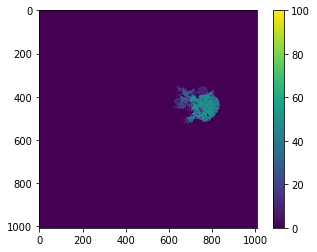

In [8]:
import rasterio as rio
import matplotlib.pyplot as plt

plt.ion()

with rio.open('propagator_dataset/output.tiff') as out_file:
    output = out_file.read(1)
    plt.imshow(output)
    plt.colorbar()

In [12]:
import geopandas as gpd
df = gpd.read_file('propagator_dataset/output.geojson')
df.head()

,value,time,geometry
0,0.5,600.0,(LINESTRING (531677.2061113222 4477647.3718177...
1,0.5,660.0,(LINESTRING (531655.9308254783 4477547.3946669...
2,0.5,720.0,(LINESTRING (531668.1773416015 4477434.6021467...
3,0.5,780.0,(LINESTRING (531657.1856872058 4477327.4449352...
4,0.5,840.0,(LINESTRING (531668.1773416015 4477334.6249959...


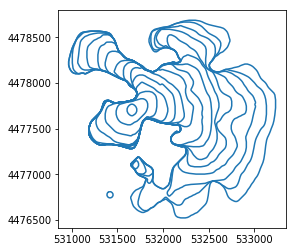

In [11]:
df.plot()